# 誤差逆伝播法
お手本と出力を比較することで，重みwや，バイアスbを修正していく学習手法のこと
誤差逆伝播法を理解するには『数式』か『計算グラフ』を使用する。

 ## 計算グラフ
 複数のノードとエッジによって表現される

### 計算グラフで解く
リンゴを2個消費税10％で買った場合
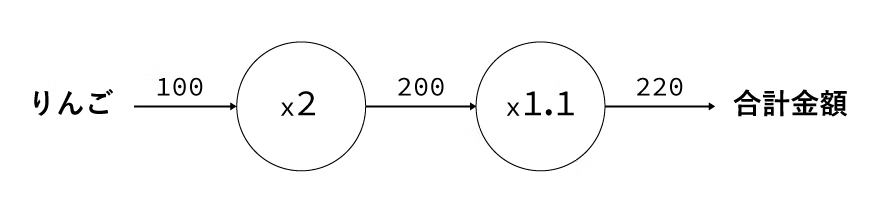

リンゴの個数や消費税を変数とすることもできる
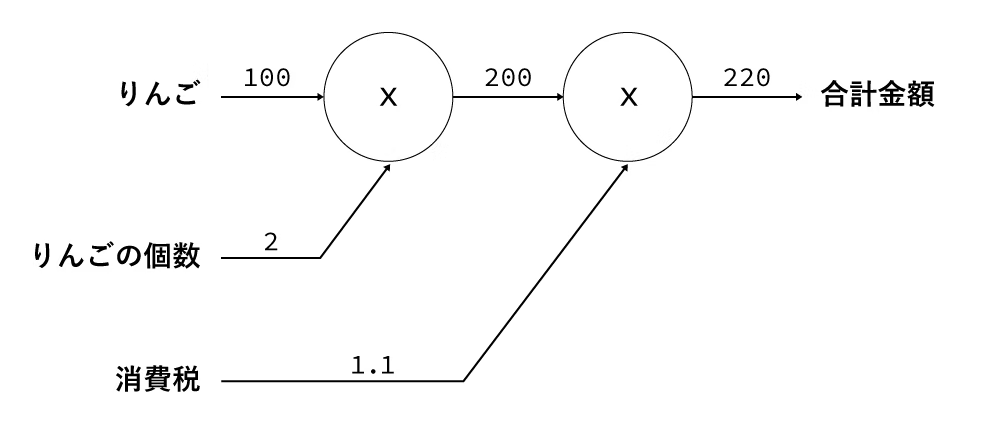

リンゴだけでなくみかんも追加する
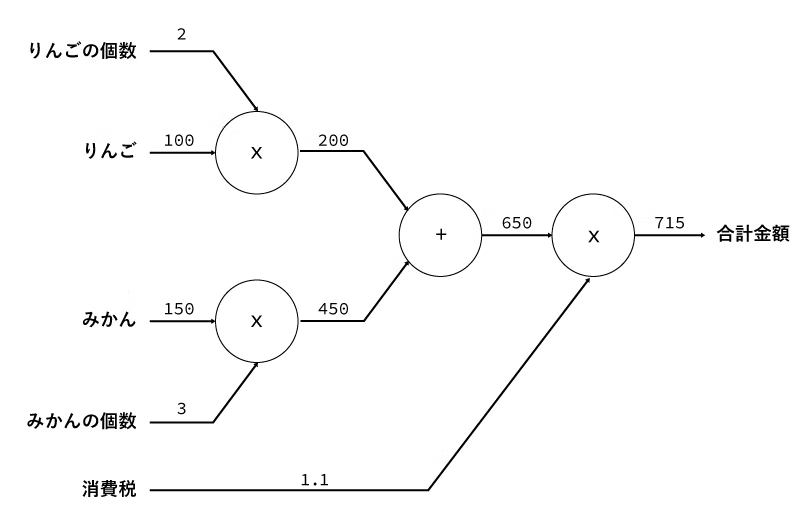

リンゴとみかんの値段を足す作業が新しく加わる

計算グラフでは左から右へと計算を進めていく

## 局所的な計算
計算グラフの特徴に局所性があることがあげられる。
例えば上の図のリンゴの部分をただの結果として200円だけにしても計算に影響がない。
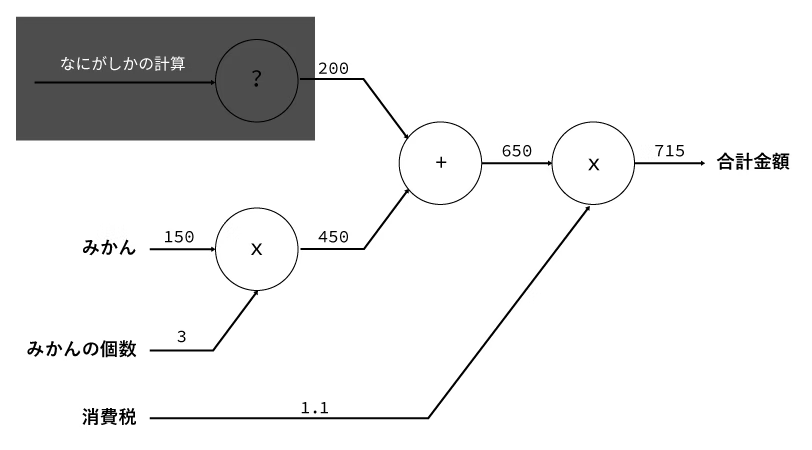

## 計算グラフで解く理由
計算グラフの利点の一つに局所的な計算ができることがある。これによって全体がどれだけ複雑な計算であっても問題を単純化することができる。そのことで勾配降下法において勾配を効率的に求めることができるようになる。そしてここに、「逆伝搬法」の「逆」たる所以がありいままで計算してきた順方向の計算を「逆」にすることで「逆伝搬法」を実現することができる。リンゴの値段が値上がりした場合の金額合計に対する影響は「りんごの値段に関する支払い額の微分」を求めることに相当する。記号にすると、りんごの値段をx、合計金額をLとして、



#                                    ${\frac{\partial L}{\partial x}}$


と表現することができる。
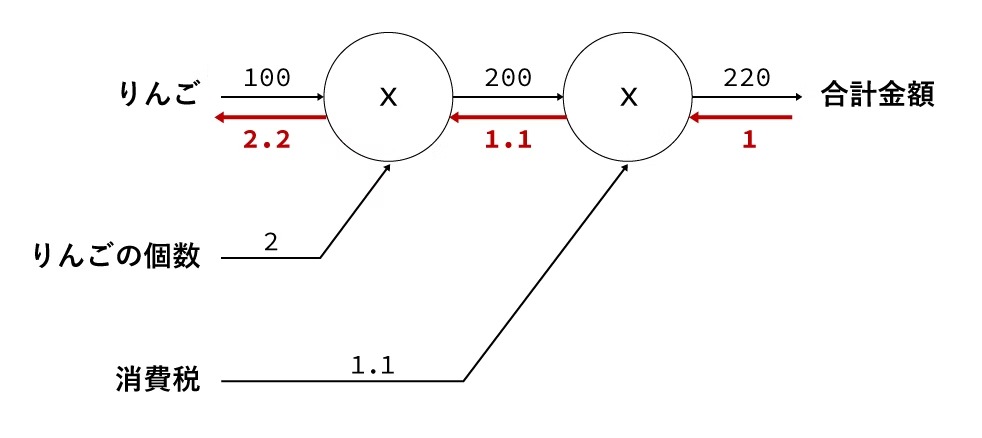

逆伝搬は「局所的な微分」を逆順にノードに渡していき、最終的な結果を得るものである。この計算からリンゴの値段が1円値上がりしたら最終的な合計金額が2.2円増えることがわかる。

## 連鎖率
上の図で説明してきたことは、いくつもの計算を行う場合、それをグラフとして表現局所的な計算をノードという単位に分解して行うものだった。そしてそれの逆伝搬を行うことで全体の微分が行える。この局所的な微分を伝達する原理は連鎖率によるものである。
### 合成関数
合成関数とは複数の関数によって構成される関数のこと。
例えば、 $z = (x + y)^2$ という式は

${z = t^2 \\t = x + y}$

というようにかんがえることができる。元の関数の導関数が、複数の関数の導関数の積として求められる。

# レイヤの実装
## 乗算レイヤの実装
forword()を純伝播、backword()が逆伝播に対応する。

In [9]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y                
        out = x * y

        return out

    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x

        return dx, dy

リンゴ2個と消費税を実装してみる

In [12]:
apple = 100
apple_num = 2
tax = 1.1

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

# backward
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print("price:", price)
print("dApple:", dapple)
print("dApple_num:", dapple_num)
print("dTax:", dtax)

price: 220.00000000000003
dApple: 2.2
dApple_num: 110.00000000000001
dTax: 200


## 加算レイヤの実装
足し算ノードである加算レイヤを実装する。

In [13]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self,x,y):
        out = x + y
        return out
    
    def backward(self,dout):
        dx = dout * 1
        dy = dout * 1 
        return dx, dy
    

リンゴ2個とみかん3個の買い物の実装

In [15]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layer
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)  # (1)
orange_price = mul_orange_layer.forward(orange, orange_num)  # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)  # (3)
price = mul_tax_layer.forward(all_price, tax)  # (4)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)  # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)  # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)  # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)  # (1)

print("price:", int(price))
print("dApple:", dapple)
print("dApple_num:", int(dapple_num))
print("dOrange:", dorange)
print("dOrange_num:", int(dorange_num))
print("dTax:", dtax)

price: 715
dApple: 2.2
dApple_num: 110
dOrange: 3.3000000000000003
dOrange_num: 165
dTax: 650


必要なレイヤを作成し純伝播のメソッドforwardを適切な順番で呼び出す。そして逆伝播のメソッドbackwardをよびだすと求めたい微分が得られる。

# 活性化レイヤの実装
## ReLUレイヤ

In [16]:
class Relu:
    def __init__(self):
        self.mask = none
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self,dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

Reluくらすはインスタント変数としてmaskという変数を持つ。

## Sigmoidレイヤ
シグモイド関数は${y = \frac{1}{1 + exp(-x)}}$であらわされる関数

計算グラフであらわすと以下のようになる。
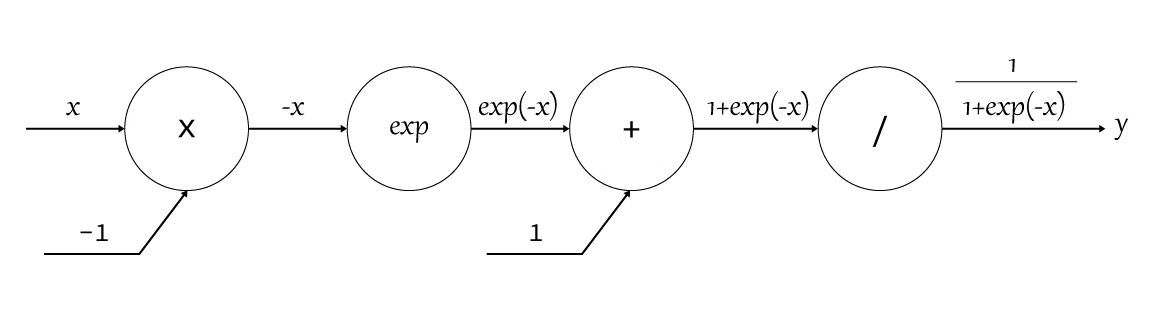
新しく、「/」ノードと「exp」ノードが出てくる。
「/」のノードはつまりは$y = \frac{1}{x}$を計算するノード。
「exp」ノードは$y = exp(x)$を表す。
それを踏まえてグラフに書き表すと次のようになる。
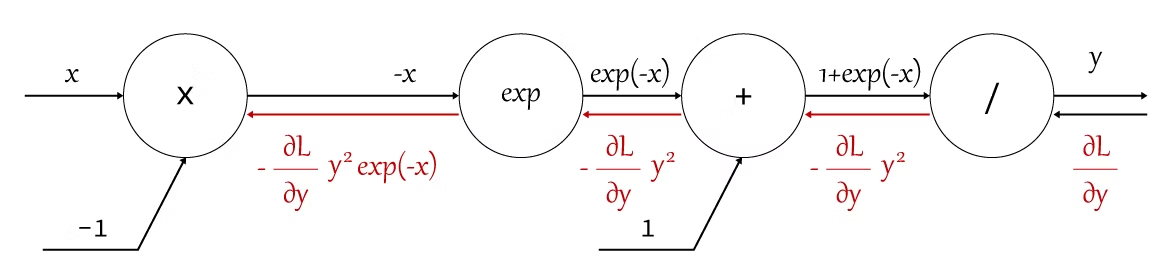
一見複雑に見えるシグモイド関数の微分も、計算グラフを用いることで「局所的な計算」の積で表すことができる。
実際に使用する場合はシグモイドレイヤとしてグループ化して計算を行うことができる
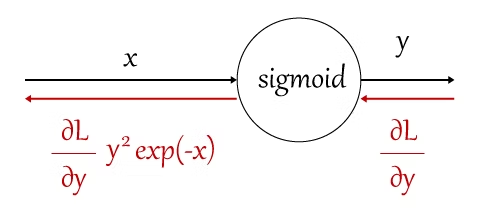
sigmoidレイヤの実装

In [20]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

## Affineレイヤ
Affineレイヤとは、ニューロンの入力信号と重みをそれぞれ掛けて総和し、それにバイアスをたす処理をレイヤにしたものです。

In [21]:
class Affine:# 入力信号に重みをかけてその総和とバイアスをたす処理のレイヤ実装
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None # 逆伝播処理で求めた各微分を保存するためにインスタンス変数を作成
        self.db = None # 逆伝播処理で求めた各微分を保存するためにインスタンス変数を作成

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)# 複数データ（バッチ）に対応させるには
        # バイアスの微分を前の微分の総和で求める

        return dx


逆伝播処理は、Affineレイヤの順伝播処理では掛け算と足し算を使っているので、バイアスの微分は前の微分を継承、重みと入力値の微分はそれぞれを転置して取り替え前の微分と掛け算することで求める。バイアスはただ継承するのではなく、バッチ処理を上のように行う

## Softmax-with-Lossレイヤ
Softmax関数と交差エントロピー誤差の二つが合体したレイヤー。（どちらも前章までで既出）
計算グラフであらわすと以下のようになる。
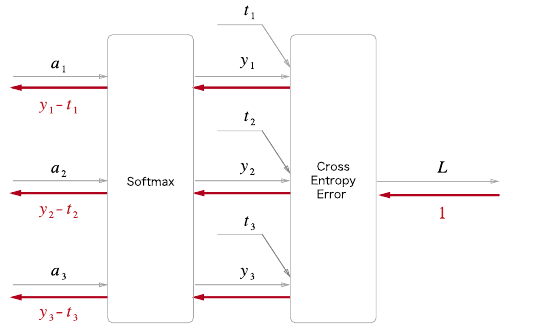
ここでは3クラス分類を行う場合を想定し前レイヤから3つのスコアを受け取るものとする。softmaxレイヤは入力された（a1,a2,a3）を正規化して（y1,y2,y3)に出力する。そしてcross entropy errorがsoftmaxから出力された（y1,y2,y3)と教師データである（t1,t2,t3）を受け取りそれらのデータから損失Lを出力する。そのとき逆伝播は（y1-t1,y2-t2,y3-t3）ときれいな結果が出る。これはsoftmaxレイヤの出力と教師ラベルの差分になる。

実装

In [23]:
class SoftmaxWithLoss:
    def __init__(self):
        """
        損失、softmaxの出力、教師データを入れる場所を作ります
        Attributes
        ----------
        loss : numpy.array
            損失
        y : numpy.array
            softmaxの出力
        t : numpy.array
            教師データの答え
        """
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        """
        順伝搬の計算をします

        Parameters
        ----------
        x : numpy.array
            前のレイヤーから出力した結果
        t : numpy.array
            教師データの答え
        Returns
        -------
        dx : float
            損失
        """
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        """
        逆伝播の計算をします

        Parameters
        ----------
        dout : int
            正規化の値(1)

        Returns
        -------
        dx : int
            損失から計算した差
        """
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size

        return dx

# 誤差伝播法の実装

今までに実装したレイヤを組み合わせることでニューラルネットワークを構築する。


In [27]:
import sys, os
sys.path.append(os.pardir) 
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads

## 勾配確認
誤差逆伝播法で求めた勾配の結果が数値微分で求めた勾配の結果と一致することを確認する作業のこと


In [30]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
W1:3.999616592040186e-10
b1:2.5488734505218744e-09
W2:5.085001066841761e-09
b2:1.3921323822746467e-07


これにより誤差を求めることができ勾配が多々しいことがわかる。

## 誤差逆伝播法を使った学習


In [31]:
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.09078333333333333 0.0893
0.9020833333333333 0.9062
0.9229833333333334 0.9256
0.9350833333333334 0.9337
0.9458833333333333 0.9445
0.9514666666666667 0.9494
0.9559833333333333 0.9523
0.9594 0.9555
0.96435 0.9602
0.9658333333333333 0.9607
0.9683833333333334 0.9638
0.9723666666666667 0.9648
0.9725 0.9649
0.9753166666666667 0.9685
0.97635 0.9678
0.97675 0.9666
0.9791833333333333 0.9683


訓練が進むにつれて精度が増して出力として、エポックごとに訓練データの精度とテストデータの精度が表示されていて訓練が進むにつれて精度が増していることが確認できる。